In [26]:
# Comments explaining each step of the code come from: Dino, Kendall, & Kali
# Kendall: visuals, visual insights, variable insights, and collinearity 
# Kali: visuals, insights, collinearity, visual insights
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [27]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# Display all columns and rows as notebook feature
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100) 

In [29]:
# Read in the csv file and print first 5 rows
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
# Checking data structure, null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
# Look at the amount of rows and columns
df.shape

(1460, 81)

In [32]:
# Look at the descriptive statistics of the numerical columns
# T is for transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [33]:
# T is for transpose 
# Look at the descriptive statistics of the string columns
df.select_dtypes('object').describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


Session 1

In [34]:
# Selecting the string/ categorical objects for plotting
categorical_cols = df.select_dtypes('object')
categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [35]:
# Selecting the numerical objects for plotting
numerical_cols = df.select_dtypes(include=['float', 'int'])
numerical_cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

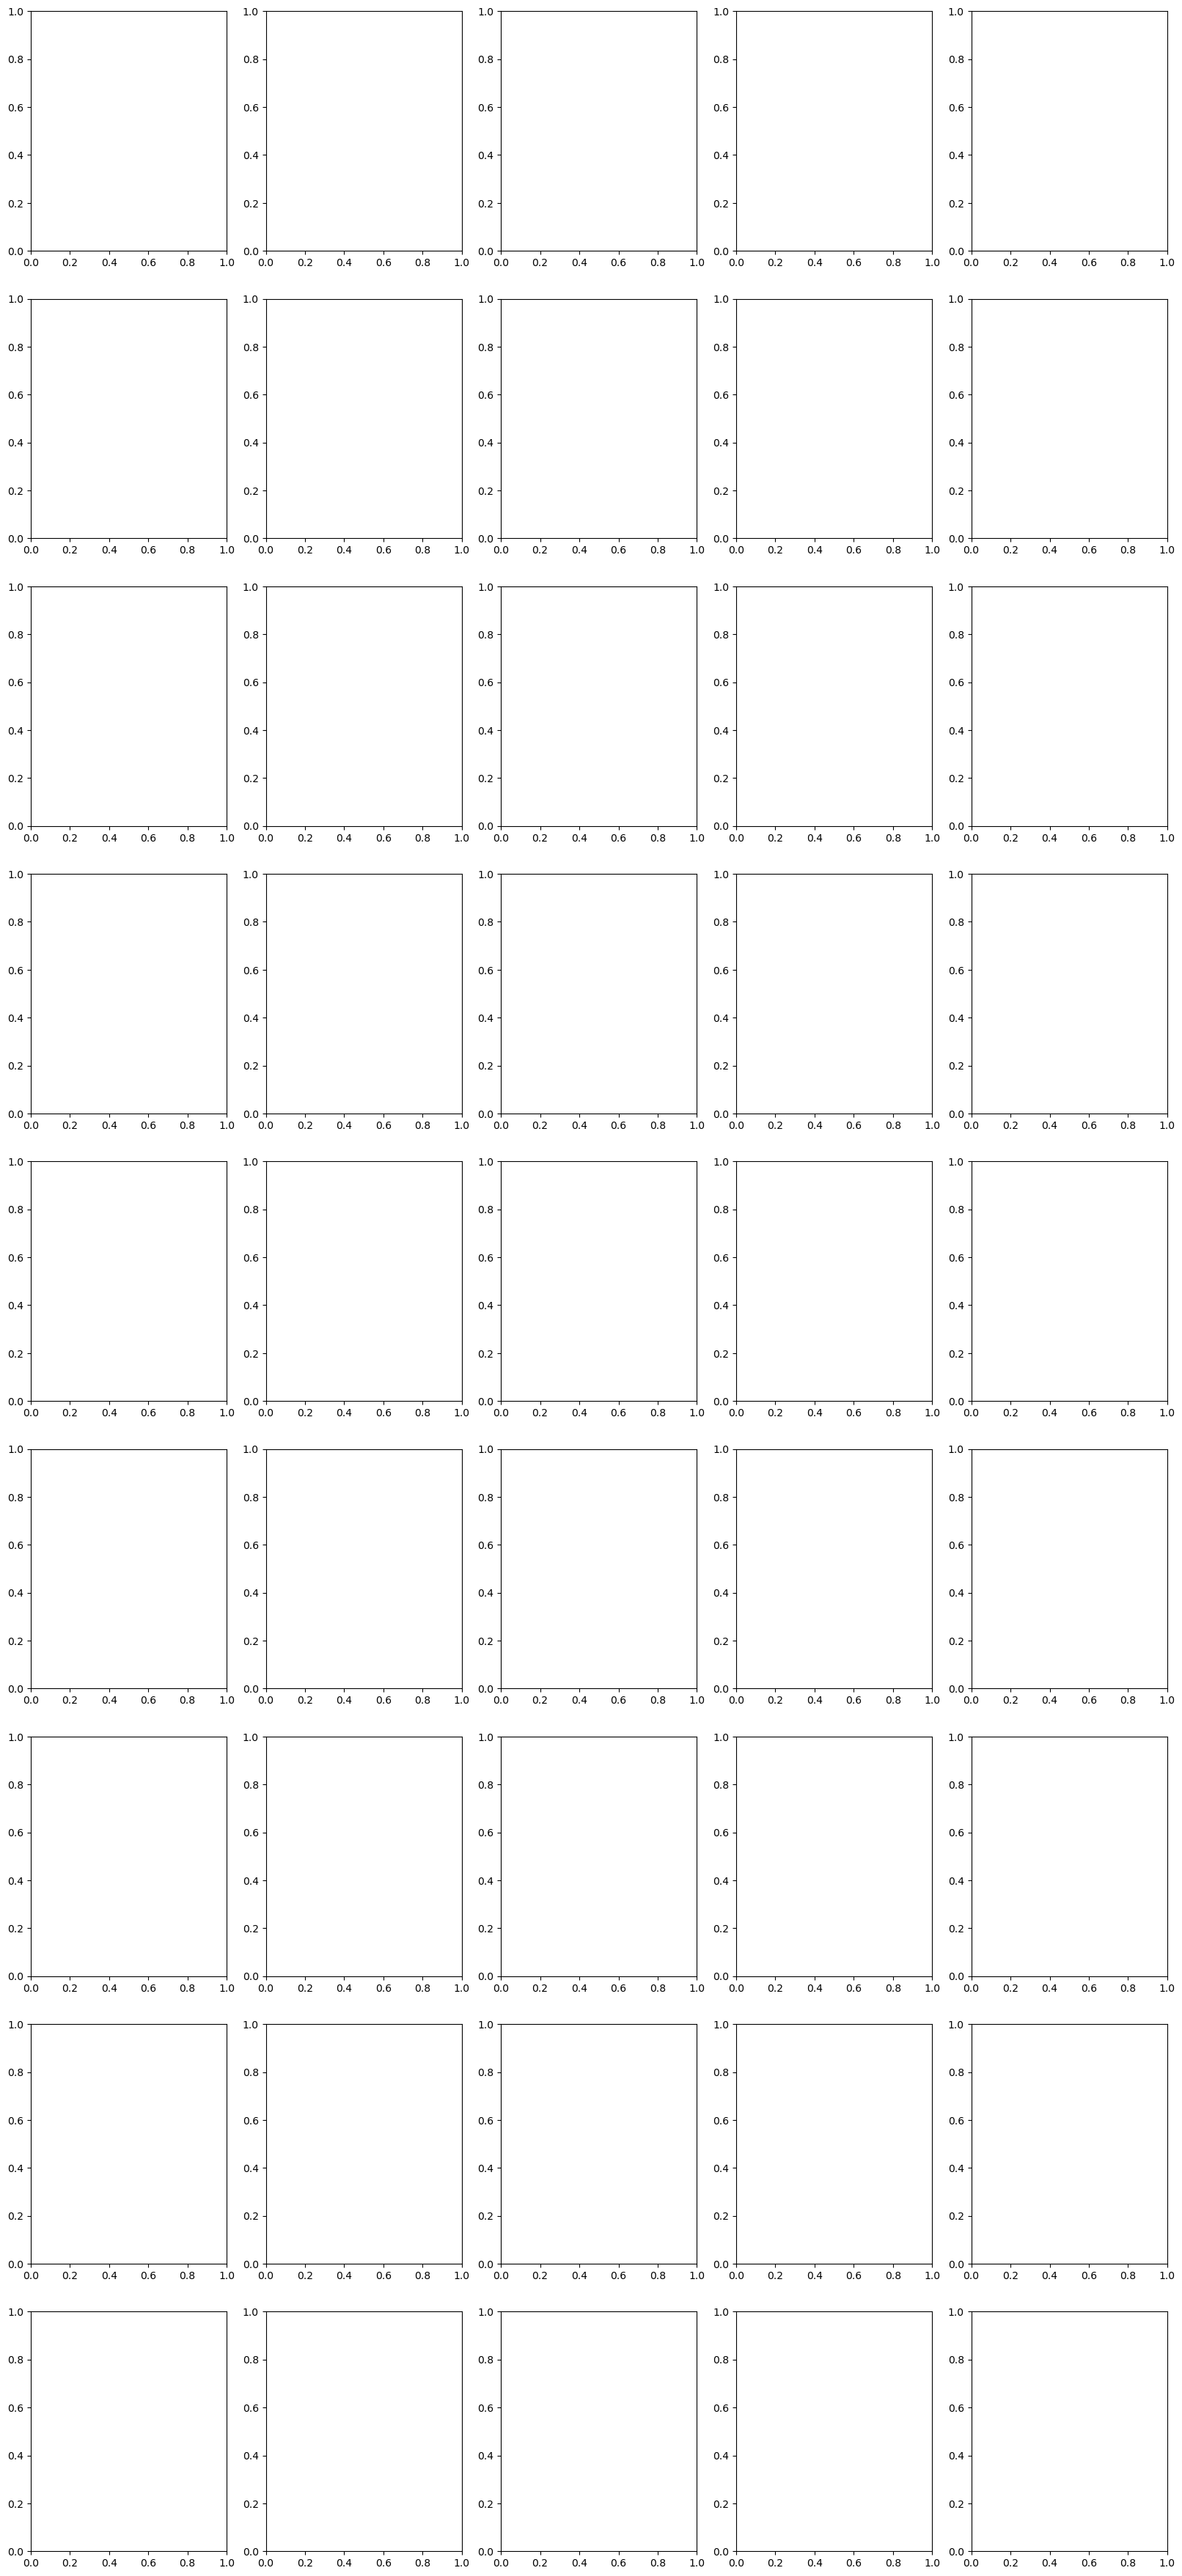

In [36]:
# Create countplots for each string 
num_cols = len(categorical_cols.columns)
num_rows = (num_cols + 4) // 5  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 5 * num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through each categorical column
for i, col in enumerate(categorical_cols.columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_xticks(axes[i].get_xticks())  # Set ticks
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
# Understanding the data: finding something interesting for the variables 
# 1. Variable: neighborhood: shows a wide distribution across various neighborhoods, with 1-2 having
# significantly higher counts. These distributions can be insightful for real estate pricing models
# 2. Variable: Housestyle can correlate to size and age of property which can be an important factor in valuing property.
# The box plots show a particular style (1Story) is more prevelant than the others, indicating a regional architectural preference
# 3. Variable: CentralAir shows that almost every property has central air conditioning. This could indicate
# a standard in region or type of properties being considered and would affect buyer interest.
# Insights made by Kendall

<Figure size 1000x800 with 0 Axes>

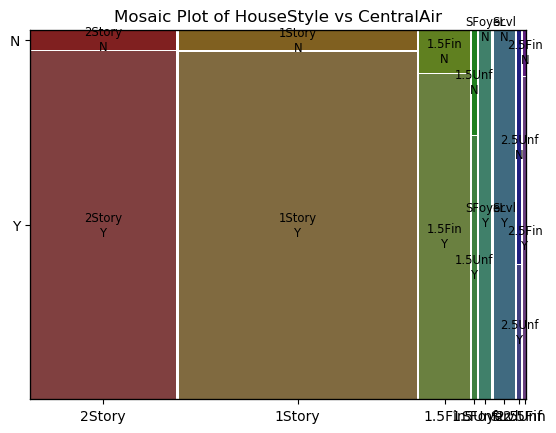

In [37]:
# Create a mosaic plot for variables HouseStyle and CentralAir
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

col1 = 'HouseStyle'
col2 = 'CentralAir' 

# Create the mosaic plot directly using the DataFrame and the column names
plt.figure(figsize=(10, 8))
mosaic(categorical_cols, [col1, col2])
plt.title(f'Mosaic Plot of {col1} vs {col2}')
plt.show()

# Each horizontal strip represents a different HouseStyle.
# The width of each strip corresponds to the relative frequency of that HouseStyle in the dataset.
# Within each HouseStyle strip, there are two sections divided by color. One section represents properties with central air conditioning (Y), and the other represents properties without it (N).
# From the plot, you can analyze which house styles commonly have central air 
# conditioning and which do not. This kind of visualization is particularly useful 
# for spotting trends and anomalies within categorical data

AttributeError: 'SubplotSpec' object has no attribute 'rowspan'

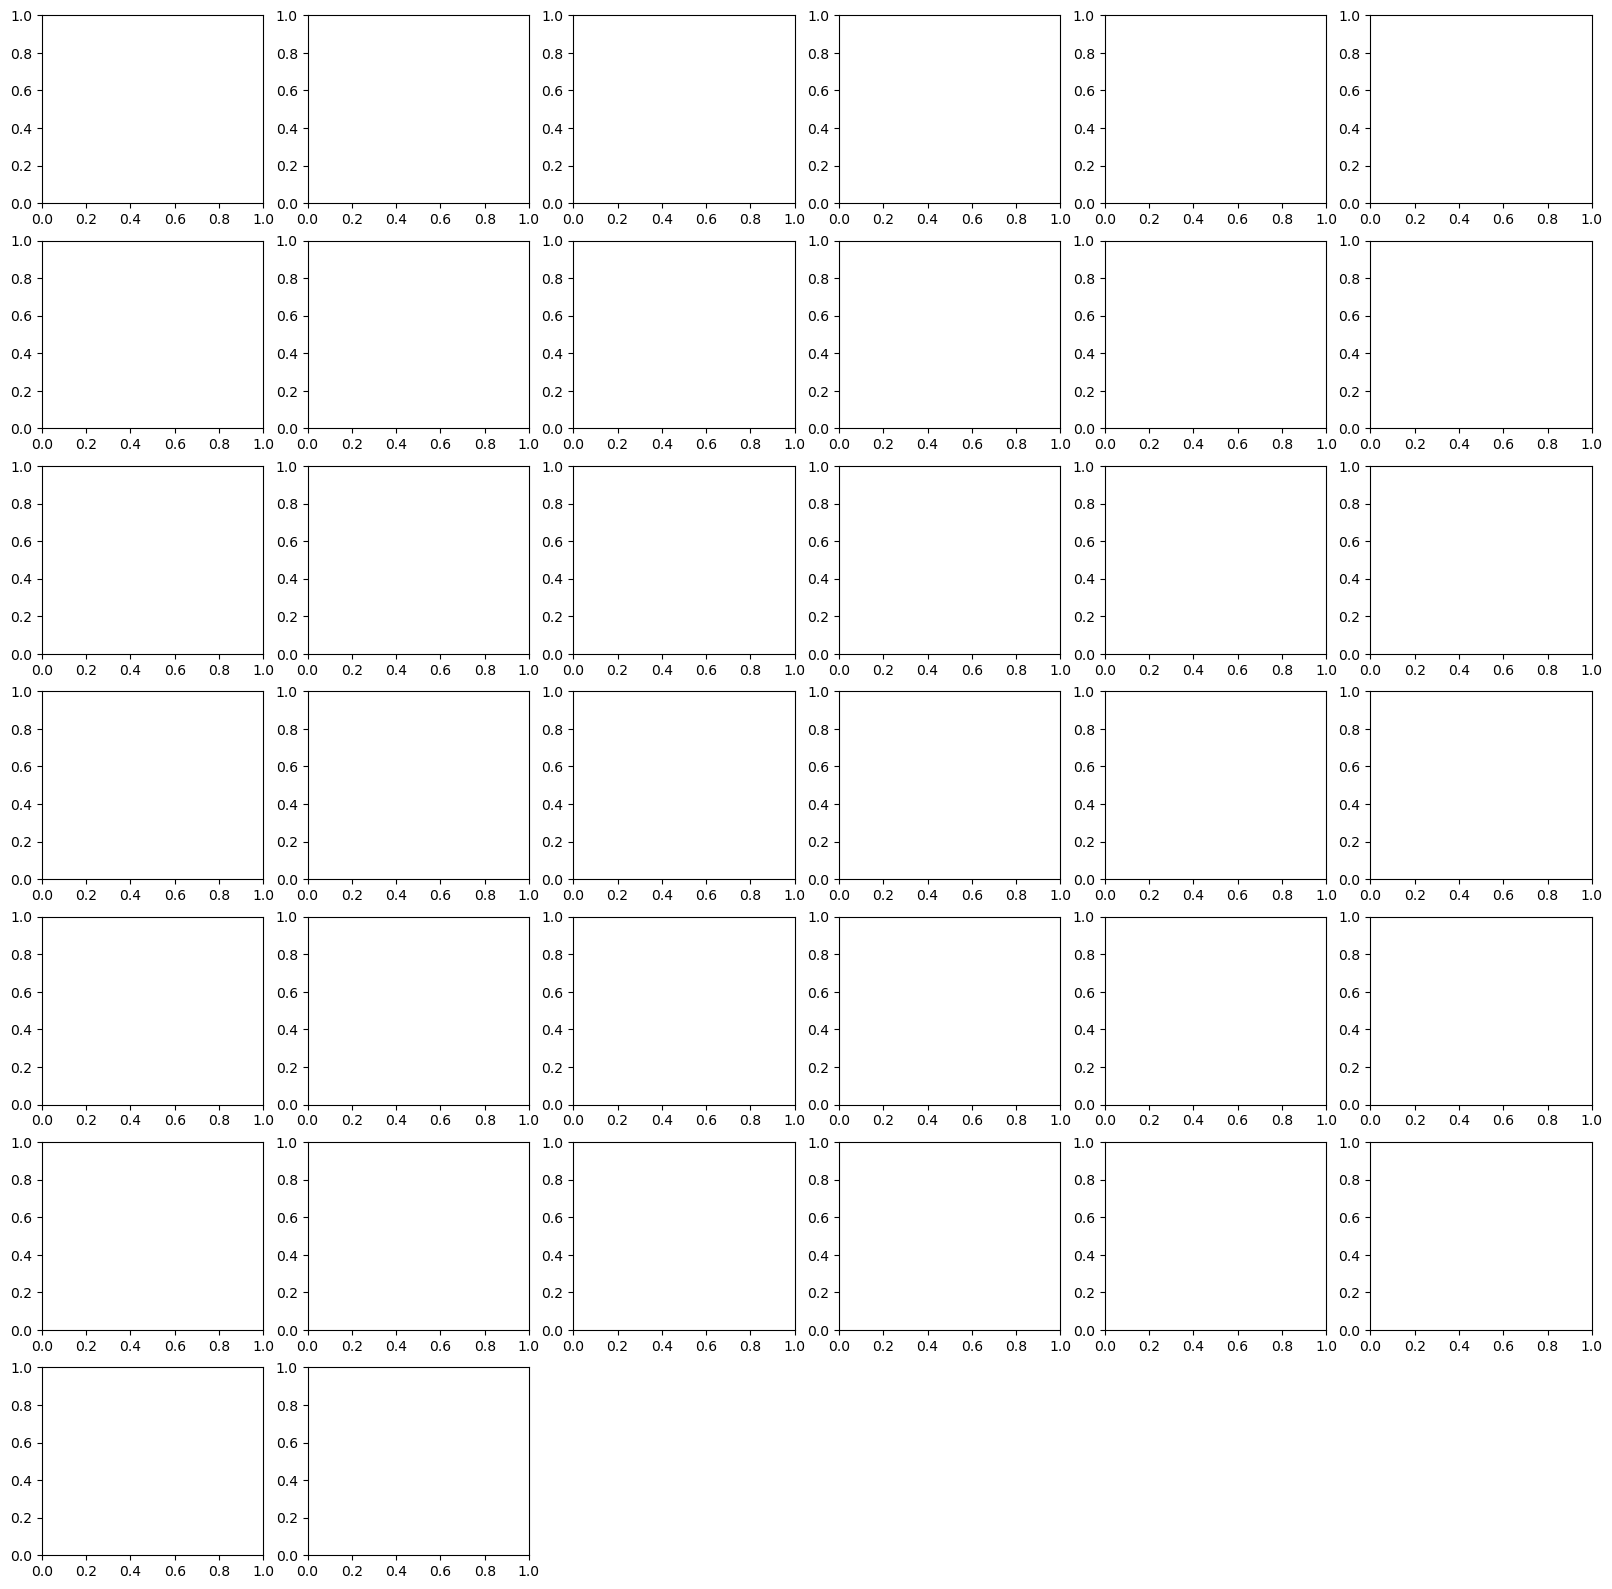

In [38]:
# Create histograms for each numerical column
numerical_cols.hist(figsize=(20, 20), bins = 30)
plt.show()

# 3 interesting takeaways from the histograms:

# 1. YearBuilt variable shows that the # of houses built increases as the years progress, 
# with a noticeable increase in the latter half of the 20th century, indicating a housing boom or a dataset that is more heavily weighted towards newer houses.

# 2. OverallQual variable probably represents the overall material and finish of the houses, 
# and is skewed towards the higher values, suggesting the dataset contains a higher proportion of houses that are of better quality.

# 3. SalePrice histogram is right-skewed, indicating that most of the houses in the dataset are in the lower to middle price range, 
# and fewer houses in the higher price range. A small percentage of high-value properties can dramatically increase the range of the data

In [39]:
# Cardinality: Checking if the numeric data has abnormal amount of unique values
numerical_cols.nunique().sort_values(ascending= False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
PoolArea            8
BedroomAbvGr        8
GarageCars          5
YrSold              5
KitchenAbvGr        4
Fireplaces          4
BsmtFullBath        4
FullBath            4
HalfBath            3
BsmtHalfBath        3
dtype: int64

In [40]:
# For the Machine Learning Purpose, we don't need to id, so we should drop that column
df = df.drop('Id', axis = 1)
df.shape # Now that df has only 80 columns

(1460, 80)

Handle Missing Value

In [41]:
# Make a copy of the dataset for future comparison
df_fix = df.copy()

In [42]:
# Inspect the missing value in the dataframe
df_fix.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [43]:
# Missing value Percent to see the percent in dataframe
na_percent = df.isna().mean().round(4) * 100
na_percent.sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [44]:
# Drop columns with 40% na or more 
df_fix = df_fix.drop(['PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu'], axis = 1)
df_fix.shape


(1460, 75)

In [45]:
# There are 18 columns with missing values 
na_col = df_fix.columns[df_fix.isna().any()]
df.loc[:, na_col].shape

(1460, 14)

In [46]:
# Find the columns still has missing values
na_col = df_fix.columns[df_fix.isna().any()]
missing_na_cat = df_fix.loc[:,na_col].select_dtypes('object')
missing_na_cat

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,NaN,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,NaN,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA
1457,NaN,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1458,NaN,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA


In [47]:
# Finding columns with missing datatype (string or numeric)
missing_na_num = df_fix.loc[:,na_col].select_dtypes(['int','float'])
missing_na_num


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [48]:
# Use mode to fill in Categorical Missing Value, and median to fill in Numerical Missing Value
imputer_num = SimpleImputer(strategy = 'median')
imputer_cat = SimpleImputer(strategy = 'most_frequent')

# impute the num column with the parameter
imputer_num.fit_transform(missing_na_num)
df_fix[missing_na_num.columns] = imputer_num.fit_transform(df_fix[missing_na_num.columns])

In [49]:
# impute the cat column with the parameter
imputer_cat.fit(missing_na_cat)
df_fix[missing_na_cat.columns] = imputer_cat.transform(df_fix[missing_na_cat.columns])

In [50]:
# See the final Result: No more Missing Value!
df_fix.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [51]:
# New shape after dropping the missing values
df_fix.shape

(1460, 75)

After Removing the na columns, there are 1460 rows and 76 columns remaining in the dataset without any NA Values.

We can format the columns to see if there is any duplicate

In [52]:
# Make all string be lower case for identification for duplication
df_lower = df_fix.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_lower

/var/folders/kc/8tx_gqt13nz9mf5s5n2c_jy40000gn/T/ipykernel_58241/2415825240.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lower = df_fix.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,rl,65.0,8450,pave,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,brkface,196.0,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,attchd,2003.0,rfn,2,548,ta,ta,y,0,61,0,0,0,0,0,2,2008,wd,normal,208500
1,20,rl,80.0,9600,pave,reg,lvl,allpub,fr2,gtl,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,brkface,0.0,ta,ta,cblock,gd,ta,gd,alq,978,unf,0,284,1262,gasa,ex,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,ta,6,typ,1,attchd,1976.0,rfn,2,460,ta,ta,y,298,0,0,0,0,0,0,5,2007,wd,normal,181500
2,60,rl,68.0,11250,pave,ir1,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,brkface,162.0,gd,ta,pconc,gd,ta,mn,glq,486,unf,0,434,920,gasa,ex,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,gd,6,typ,1,attchd,2001.0,rfn,2,608,ta,ta,y,0,42,0,0,0,0,0,9,2008,wd,normal,223500
3,70,rl,60.0,9550,pave,ir1,lvl,allpub,corner,gtl,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd sdng,wd shng,brkface,0.0,ta,ta,brktil,ta,gd,no,alq,216,unf,0,540,756,gasa,gd,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,gd,7,typ,1,detchd,1998.0,unf,3,642,ta,ta,y,0,35,272,0,0,0,0,2,2006,wd,abnorml,140000
4,60,rl,84.0,14260,pave,ir1,lvl,allpub,fr2,gtl,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,brkface,350.0,gd,ta,pconc,gd,ta,av,glq,655,unf,0,490,1145,gasa,ex,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,gd,9,typ,1,attchd,2000.0,rfn,3,836,ta,ta,y,192,84,0,0,0,0,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,rl,62.0,7917,pave,reg,lvl,allpub,inside,gtl,gilbert,norm,norm,1fam,2story,6,5,1999,2000,gable,compshg,vinylsd,vinylsd,brkface,0.0,ta,ta,pconc,gd,ta,no,unf,0,unf,0,953,953,gasa,ex,y,sbrkr,953,694,0,1647,0,0,2,1,3,1,ta,7,typ,1,attchd,1999.0,rfn,2,460,ta,ta,y,0,40,0,0,0,0,0,8,2007,wd,normal,175000
1456,20,rl,85.0,13175,pave,reg,lvl,allpub,inside,gtl,nwames,norm,norm,1fam,1story,6,6,1978,1988,gable,compshg,plywood,plywood,stone,119.0,ta,ta,cblock,gd,ta,no,alq,790,rec,163,589,1542,gasa,ta,y,sbrkr,2073,0,0,2073,1,0,2,0,3,1,ta,7,min1,2,attchd,1978.0,unf,2,500,ta,ta,y,349,0,0,0,0,0,0,2,2010,wd,normal,210000
1457,70,rl,66.0,9042,pave,reg,lvl,allpub,inside,gtl,crawfor,norm,norm,1fam,2story,7,9,1941,2006,gable,compshg,cemntbd,cmentbd,brkface,0.0,ex,gd,stone,ta,gd,no,glq,275,unf,0,877,1152,gasa,ex,y,sbrkr,1188,1152,0,2340,0,0,2,0,4,1,gd,9,typ,2,attchd,1941.0,rfn,1,252,ta,ta,y,0,60,0,0,0,0,2500,5,2010,wd,normal,266500
1458,20,rl,68.0,9717,pave,reg,lvl,allpub,inside,gtl,names,norm,norm,1fam,1story,5,6,1950,1996,hip,compshg,metalsd,metalsd,brkface,0.0,ta,ta,cblock,ta,ta,mn,glq,49,rec,1029,0,1078,gasa,gd,y,fusea,1078,0,0,1078,1,0,1,0,2,1,gd,5,typ,0,attchd,1950.0,unf,1,240,ta,ta,y,366,0,112,0,0,0,0,4,2010,wd,normal,142125


In [53]:
# There is no duplicated in the dataframe
df_lower.duplicated().sum()
df_lower.drop_duplicates()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,rl,65.0,8450,pave,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,brkface,196.0,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,attchd,2003.0,rfn,2,548,ta,ta,y,0,61,0,0,0,0,0,2,2008,wd,normal,208500
1,20,rl,80.0,9600,pave,reg,lvl,allpub,fr2,gtl,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,brkface,0.0,ta,ta,cblock,gd,ta,gd,alq,978,unf,0,284,1262,gasa,ex,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,ta,6,typ,1,attchd,1976.0,rfn,2,460,ta,ta,y,298,0,0,0,0,0,0,5,2007,wd,normal,181500
2,60,rl,68.0,11250,pave,ir1,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,brkface,162.0,gd,ta,pconc,gd,ta,mn,glq,486,unf,0,434,920,gasa,ex,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,gd,6,typ,1,attchd,2001.0,rfn,2,608,ta,ta,y,0,42,0,0,0,0,0,9,2008,wd,normal,223500
3,70,rl,60.0,9550,pave,ir1,lvl,allpub,corner,gtl,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd sdng,wd shng,brkface,0.0,ta,ta,brktil,ta,gd,no,alq,216,unf,0,540,756,gasa,gd,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,gd,7,typ,1,detchd,1998.0,unf,3,642,ta,ta,y,0,35,272,0,0,0,0,2,2006,wd,abnorml,140000
4,60,rl,84.0,14260,pave,ir1,lvl,allpub,fr2,gtl,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,brkface,350.0,gd,ta,pconc,gd,ta,av,glq,655,unf,0,490,1145,gasa,ex,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,gd,9,typ,1,attchd,2000.0,rfn,3,836,ta,ta,y,192,84,0,0,0,0,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,rl,62.0,7917,pave,reg,lvl,allpub,inside,gtl,gilbert,norm,norm,1fam,2story,6,5,1999,2000,gable,compshg,vinylsd,vinylsd,brkface,0.0,ta,ta,pconc,gd,ta,no,unf,0,unf,0,953,953,gasa,ex,y,sbrkr,953,694,0,1647,0,0,2,1,3,1,ta,7,typ,1,attchd,1999.0,rfn,2,460,ta,ta,y,0,40,0,0,0,0,0,8,2007,wd,normal,175000
1456,20,rl,85.0,13175,pave,reg,lvl,allpub,inside,gtl,nwames,norm,norm,1fam,1story,6,6,1978,1988,gable,compshg,plywood,plywood,stone,119.0,ta,ta,cblock,gd,ta,no,alq,790,rec,163,589,1542,gasa,ta,y,sbrkr,2073,0,0,2073,1,0,2,0,3,1,ta,7,min1,2,attchd,1978.0,unf,2,500,ta,ta,y,349,0,0,0,0,0,0,2,2010,wd,normal,210000
1457,70,rl,66.0,9042,pave,reg,lvl,allpub,inside,gtl,crawfor,norm,norm,1fam,2story,7,9,1941,2006,gable,compshg,cemntbd,cmentbd,brkface,0.0,ex,gd,stone,ta,gd,no,glq,275,unf,0,877,1152,gasa,ex,y,sbrkr,1188,1152,0,2340,0,0,2,0,4,1,gd,9,typ,2,attchd,1941.0,rfn,1,252,ta,ta,y,0,60,0,0,0,0,2500,5,2010,wd,normal,266500
1458,20,rl,68.0,9717,pave,reg,lvl,allpub,inside,gtl,names,norm,norm,1fam,1story,5,6,1950,1996,hip,compshg,metalsd,metalsd,brkface,0.0,ta,ta,cblock,ta,ta,mn,glq,49,rec,1029,0,1078,gasa,gd,y,fusea,1078,0,0,1078,1,0,1,0,2,1,gd,5,typ,0,attchd,1950.0,unf,1,240,ta,ta,y,366,0,112,0,0,0,0,4,2010,wd,normal,142125


Now we are handling outliers

In [54]:
# Checking outliers in Numerical columns in df_fix
numerical_cols_fix = df_fix.select_dtypes(['int','float'])
numerical_cols_fix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [55]:
# Finding 1st and 3rd quantile and IQR (helps find outliers)
twenty_fifth = numerical_cols_fix.quantile(0.25)
seventy_fifth = numerical_cols_fix.quantile(0.75)

iqr = seventy_fifth - twenty_fifth
iqr

MSSubClass          50.00
LotFrontage         19.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         39.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64

In [56]:
# Setting Threshold for these columns
right_off = seventy_fifth + iqr*1.5
left_off = twenty_fifth - iqr*1.5

In [57]:
outliers = df_fix[(df_fix[numerical_cols_fix.columns] > right_off)|(df_fix[numerical_cols_fix.columns] < left_off)]
outliers

# Summarize the variables with outliers

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Columns with Outliers values
outliers.count().sort_values(ascending=False)

EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
LotFrontage      106
MSSubClass       103
MasVnrArea        98
BsmtHalfBath      82
OpenPorchSF       77
LotArea           69
KitchenAbvGr      68
TotalBsmtSF       61
SalePrice         61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
YearBuilt          7
BsmtFinSF1         7
PoolArea           7
Fireplaces         5
GarageCars         5
OverallQual        2
2ndFlrSF           2
GarageYrBlt        1
BsmtFullBath       1
Utilities          0
KitchenQual        0
YrSold             0
MoSold             0
SaleCondition      0
Functional         0
LotShape           0
GarageType         0
LandContour        0
GarageFinish       0
SaleType           0
Street             0
HalfBath           0
GarageCond         0
PavedDrive         0
GarageQual   

In [59]:
# Drop columns with 100 outliers or more
df_fix.drop(['EnclosedPorch', 'BsmtFinSF2', 'OverallCond', 'ScreenPorch', 'LotFrontage', 'MSSubClass'], axis = 1, inplace= True)

With this code, we can find all the outliers in the dataframe!

In [60]:
# Selecting the categorical variables from the object string columns
categorical_cols_fix = df_fix.select_dtypes('object').columns
dummy_df = pd.get_dummies(df_fix[categorical_cols_fix], drop_first = True)
dummy_df

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,Fal

In [61]:
# Combining the colummns 
df_with_dummy = pd.concat([df_fix, dummy_df], axis = 1)

In [62]:
# Remove the categorical columns
df_machine_learning = df_with_dummy.drop(categorical_cols_fix, axis= 1)
df_machine_learning

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,2,2008,208500,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,9600,6,1976,1976,0.0,978,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,5,2007,181500,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,11250,7,2001,2002,162.0,486,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,9,2008,223500,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,9550,7,1915,1970,0.0,216,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,0,0,0,2,2006,140000,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,14260,8,2000,2000,350.0,655,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,12,2008,250000,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [63]:
# We now have the dataset for machine learning
df_machine_learning.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,3.409589,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,9981.264932,1.382997,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,29.317331,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,11601.500000,7.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,508.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
df_machine_learning.columns[:50]

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste'],
      dtype='object')

After transfer the categorical variable to dummy variable, we now can standaridize or normalize the columns

In [65]:
# Normalization
# Assume we want to predict Price, so we normalize all the other values in the df
scalar = MinMaxScaler()
not_dummy_num_col = ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df_machine_learning.loc[:,not_dummy_num_col]

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,7,2003,2003,196.0,706,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,2,2008
1,9600,6,1976,1976,0.0,978,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,5,2007
2,11250,7,2001,2002,162.0,486,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,9,2008
3,9550,7,1915,1970,0.0,216,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,0,0,0,2,2006
4,14260,8,2000,2000,350.0,655,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,0.0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,8,2007
1456,13175,6,1978,1988,119.0,790,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,2,2010
1457,9042,7,1941,2006,0.0,275,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,2500,5,2010
1458,9717,5,1950,1996,0.0,49,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,0,0,0,4,2010


In [66]:
scalar.fit(df_machine_learning.loc[:,not_dummy_num_col])

MinMaxScaler()

In [67]:
# All the value has within range from 0 to 1 expect Salesprice
df_machine_learning[not_dummy_num_col] = scalar.transform(df_machine_learning.loc[:,not_dummy_num_col])
df_machine_learning

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.033420,0.666667,0.949275,0.883333,0.122500,0.125089,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.0,0.0,0.00000,0.090909,0.50,208500,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.038795,0.555556,0.753623,0.433333,0.000000,0.173281,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.0,0.0,0.00000,0.363636,0.25,181500,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,0.046507,0.666667,0.934783,0.866667,0.101250,0.086109,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.0,0.0,0.00000,0.727273,0.50,223500,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,0.038561,0.666667,0.311594,0.333333,0.000000,0.038271,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.0,0.0,0.00000,0.090909,0.00,140000,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,0.060576,0.777778,0.927536,0.833

**Collinarity**

In [71]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# Assuming df_machine_learning is your DataFrame
# Select only numerical features for VIF
numerical_df = df_machine_learning.select_dtypes(include=[np.number])

# If you have categorical features, one-hot encode them
# and then join them back to the numerical features
categorical_df = df_machine_learning.select_dtypes(exclude=[np.number])
if not categorical_df.empty:
    encoder = OneHotEncoder(drop='first')
    encoder.fit(categorical_df)
    encoded_categorical = encoder.transform(categorical_df).toarray()
    # Use get_feature_names_out for scikit-learn 0.22 and later
    encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                          columns=encoder.get_feature_names_out(categorical_df.columns))
    # Join the encoded categorical dataframe with the numerical one
    final_df = pd.concat([numerical_df.reset_index(drop=True), 
                          encoded_categorical_df.reset_index(drop=True)], axis=1)
else:
    final_df = numerical_df



In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming final_df is your DataFrame after concatenating numerical and one-hot encoded categorical features

# The variance_inflation_factor expects a constant term in the data, so we need to add one
final_df = sm.add_constant(final_df)

# This function calculates VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    # The variance_inflation_factor function requires a positional index for the features, hence the use of range
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for each feature in the DataFrame
vif_df = calculate_vif(final_df)

# Sort the features by the highest VIF values first
vif_df = vif_df.sort_values('VIF', ascending=False)

# Display the VIF values
vif_df


/Users/kendallprager/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,1stFlrSF,inf
115,Exterior1st_CBlock_True,inf
129,Exterior2nd_CBlock_True,inf
12,GrLivArea,inf
11,LowQualFinSF,inf
10,2ndFlrSF,inf
0,const,1.200624e+04
100,RoofStyle_Gable_True,1.629415e+02
102,RoofStyle_Hip_True,1.513959e+02
211,GarageCond_TA_True,1.130933e+02


In [ ]:
#Comments on the features and their corresponding VIF Numbers 
    #The features with infinite VIF values are likely duplicates or transformations of other features 
    #Features with high VIF numbers are also very concerning. Their high VIF values mean that they are highly predictable based on other features in the dataset 
    #Features with VIF just above the common threshhold of 5 (SalePrice,FullBath,YearBuilt etc)although less extreme still indicate multicollinearity that could be problematic 
    #Features with VIF values close to 1 are not a concern regarding multicolinearity 

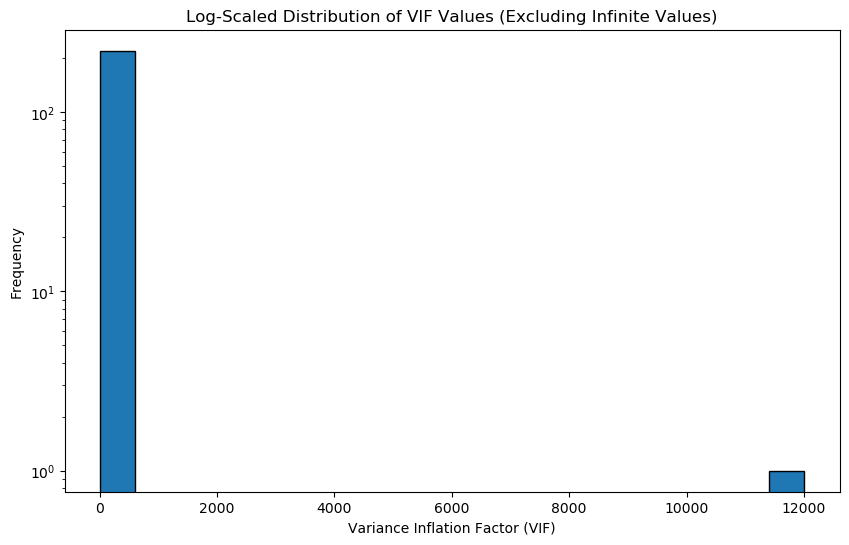

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exclude infinite values for the histogram
finite_vif_values = vif_df['VIF'][np.isfinite(vif_df['VIF'])]

plt.figure(figsize=(10, 6))
plt.hist(vif_df['VIF'][np.isfinite(vif_df['VIF'])], bins=20, edgecolor='black', log=True)
plt.title('Log-Scaled Distribution of VIF Values (Excluding Infinite Values)')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Frequency')
plt.show()



In [ ]:
#most of the VIF values are concentrated in the first bin
#This is likely because ywe have a few very high VIF values reaching into the thousands or more
